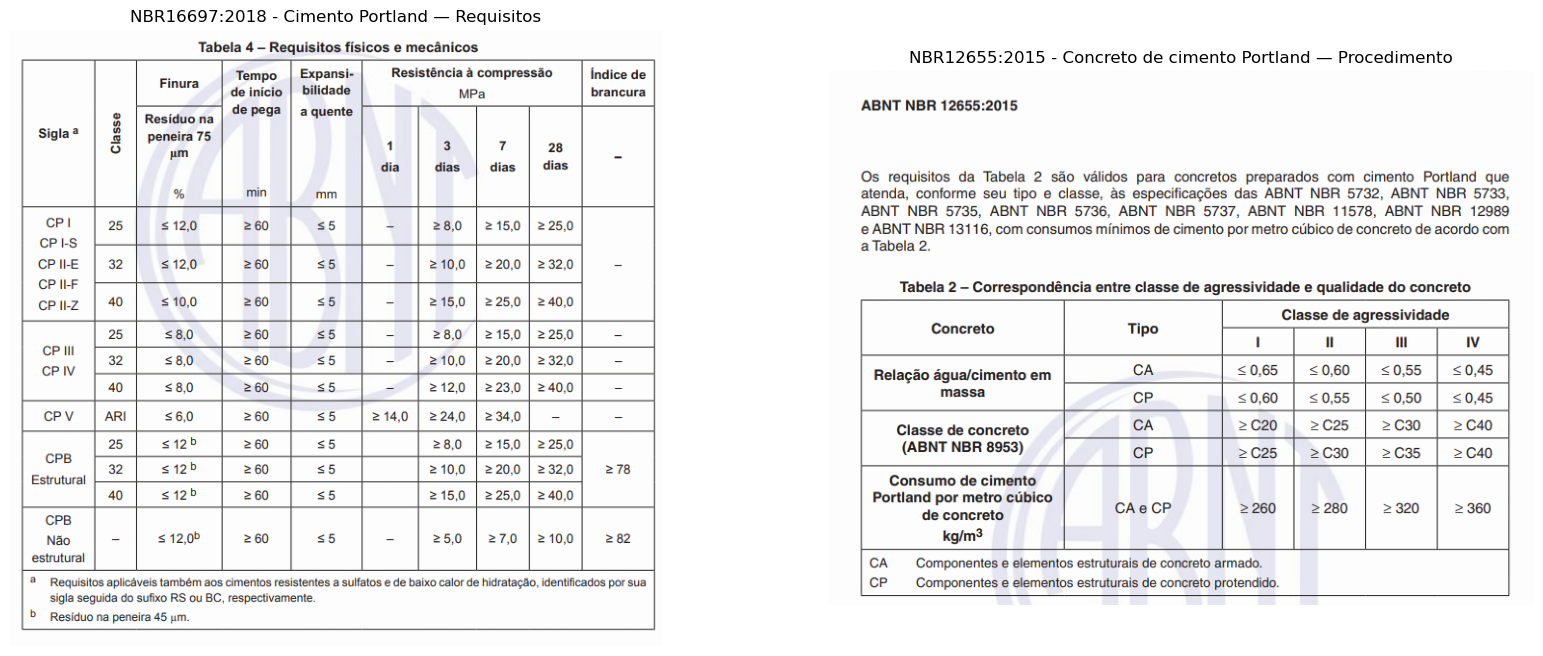

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

img1 = mpimg.imread('imgs/nbr16697.png')
axs[0].imshow(img1)
axs[0].axis('off')  # Hide axes
axs[0].set_title('NBR16697:2018 - Cimento Portland — Requisitos')

img2 = mpimg.imread('imgs/nbr12655.png')
axs[1].imshow(img2)
axs[1].axis('off')  # Hide axes
axs[1].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')

plt.show()


# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

img3 = mpimg.imread('imgs/nbr12655_definicoes.png')
axs[0].imshow(img3)
axs[0].axis('off')  # Hide axes
axs[0].set_title('NBR16697:2018 - Cimento Portland — Requisitos')

img4 = mpimg.imread('imgs/nbr12655_resistencia.png')
axs[1].imshow(img4)
axs[1].axis('off')  # Hide axes
axs[1].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')

img5 = mpimg.imread('imgs/nbr12655_sd.png')
axs[2].imshow(img5)
axs[2].axis('off')  # Hide axes
axs[2].set_title('NBR12655:2022 - Concreto de cimento Portland — Procedimento')


def NBR_compressive_strength(concrete_class, age_days):
    # Dictionary to hold compressive strength data at 3, 7, and 28 days for each class
    compressive_strength = {
        'CP I': {'3_days': 8.0, '7_days': 15.0, '28_days': 25.0},
        'CP I-S': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP I-E': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP II-F': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP II-Z': {'3_days': 10.0, '7_days': 20.0, '28_days': 32.0},
        'CP III': {'3_days': 10.0, '7_days': 18.0, '28_days': 25.0},
        'CP IV': {'3_days': 14.0, '7_days': 23.0, '28_days': 40.0},
        'CP V': {'3_days': 14.0, '7_days': 24.0, '28_days': 34.0},
    }

    # Get the compressive strength for the specified class
    if concrete_class in compressive_strength:
        return compressive_strength[concrete_class][age_days]
    else:
        return "Concrete class/age not found"

# Example usage:
concrete_class = 'CP V'
age = '7_days'
strength = NBR_compressive_strength(concrete_class, age)
# print(f"Compressive strength for {concrete_class}:\n{age}: {strength}")

def run_regression(data, drop_columns, target):
    X = data.drop(drop_columns, axis=1)
    y = data[target]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()
    
    # Fit the scaler on the training data and transform both the training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define the regression algorithms
    regressors = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(),
        'Gradient Boosting Regressor': GradientBoostingRegressor()
    }
    
    # Initialize a dictionary to store results
    results = {}
    
    # Train and evaluate each regressor
    for name, regressor in regressors.items():
        # Train the model
        regressor.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = regressor.predict(X_test_scaled)
        
        # Calculate performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
    # Convert results to DataFrame for better readability
    results_df = pd.DataFrame(results).T
    
    # Print the report
    print("Regression Algorithms Performance Report:")
    print(results_df)

In [2]:
from Tbx_PreProcessing import *
from Tbx_Regression import *

data = pd.read_excel('data/Concreto_IACC.xlsx')

df_cimento = data[~data['cimento Classe de resistência'].isna()]
df_cimento.rename(columns = {'CT Água ' : 'CT Água'})

df_cimento.columns = ['Empresa', 'Planta', 'Nota Fiscal', 'Volume', 'Nome produto',
       'Código do produto', 'Data', 'Horário', 'Cidade', 'Nome Central',
       'cimento Tipo', 'cimento Classe de resistência',
       'cimento Resistência real 3d', 'cimento Resistência real 7d',
       'cimento Resistência real 28d', 'cimento Fornecedor', 'cimento Cidade',
       'concreto Cimento', 'concreto Fíler calcário', 'concreto Cinza volante',
       'concreto Escória', 'concreto Argila calcinada', 'concreto Silica',
       'concreto Plastificante', 'concreto Polifuncional',
       'concreto Superplastificante', 'concreto Incorporador de ar',
       'concreto Brita 0', 'concreto Brita 1', 'concreto Brita 2',
       'concreto Areia natural', 'concreto Areia artificial',
       'concreto Água (automação)', 'concreto Água (ponto de carga)',
       'concreto Água (lastro de retorno)', 'concreto Água caminhão',
       'concreto Umidade brita 0', 'concreto Umidade brita 1',
       'concreto Umidade brita 2', 'concreto Umidade areia natural',
       'concreto Umidade areia artificial', 'Mesp Brita 0', 'Mesp Brita 1',
       'Mesp Brita 2', 'Mesp Areia natural', 'Mesp Areia artificial',
       'Tempo de transporte', 'Temperatura ambiente', 'Slump', 'Fc 1d',
       'Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck', 'CT Cimento', 'CT Fíler calcário',
       'CT Cinza volante', 'CT Escória', 'CT Argila calcinada', 'CT Silica',
       'CT Plastificante', 'CT Polifuncional', 'CT Superplastificante',
       'CT Incorporador de ar', 'CT Brita 0', 'CT Brita 1', 'CT Brita 2',
       'CT Areia natural', 'CT Areia artificial', 'CT Água']


df_concreto = df_cimento[['Empresa', 'Planta', 'Nota Fiscal',
'Data', 'Horário', 'Cidade', 
'cimento Tipo', 'cimento Classe de resistência',
'concreto Cimento', 'concreto Fíler calcário', 'concreto Cinza volante',
'concreto Escória', 'concreto Argila calcinada', 'concreto Silica',
'concreto Plastificante', 'concreto Polifuncional',
'concreto Superplastificante', 'concreto Incorporador de ar',
'concreto Brita 0', 'concreto Brita 1', 'concreto Brita 2',
'concreto Areia natural', 'concreto Areia artificial',
'concreto Água (automação)', 'concreto Água (ponto de carga)',
'concreto Água (lastro de retorno)', 'concreto Água caminhão',
'concreto Umidade brita 0', 'concreto Umidade brita 1',
'concreto Umidade brita 2', 'concreto Umidade areia natural',
'concreto Umidade areia artificial', 'Mesp Brita 0', 'Mesp Brita 1',
'Mesp Brita 2', 'Mesp Areia natural', 'Mesp Areia artificial',
'Tempo de transporte', 'Temperatura ambiente', 'Slump', 'Fc 1d',
'Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck', 'CT Cimento', 'CT Fíler calcário',
'CT Cinza volante', 'CT Escória', 'CT Argila calcinada', 'CT Silica',
'CT Plastificante', 'CT Polifuncional', 'CT Superplastificante',
'CT Incorporador de ar', 'CT Brita 0', 'CT Brita 1', 'CT Brita 2',
'CT Areia natural', 'CT Areia artificial', 'CT Água']]

# df_concreto = df_concreto.dropna(axis=1, how='all')

missing_percentage = df_concreto.isna().mean() * 100
dropout_columns_NA = missing_percentage[missing_percentage > 70].index

missing_percentage[missing_percentage > 20]


# /*******//*******//*******//*******//*******//*******//*******//*******//*******//*******//*******//*******//*******/


df_concreto_traco = df_concreto[df_concreto.columns[~df_concreto.columns.isin(dropout_columns_NA)]].copy()

df_concreto_traco['CT Polifuncional'] = df_concreto_traco['CT Polifuncional'].str.replace(',,', '', regex=False)

df_concreto_traco['cimento Classe de resistência'] = df_concreto_traco['cimento Classe de resistência'].astype(str)


def extract_mean(value):
    match = re.match(r'(\d+)', value)  # Extract numbers before any non-numeric characters
    if match:
        return float(match.group(1))
    else:
        return None
    
df_concreto_traco['Slump'] = df_concreto_traco['Slump'].astype(str)
df_concreto_traco['Slump'] = df_concreto_traco['Slump'].str.replace('S', '')
df_concreto_traco['Slump'] = df_concreto_traco['Slump'].apply(extract_mean)
df_concreto_traco['Slump'] = df_concreto_traco['Slump'].astype(int)

df_concreto_traco['cimento Tipo'] = df_concreto_traco['cimento Tipo'].str.strip()

ID_columns = ['Empresa', 'Planta', 'Nota Fiscal', 'Data', 'Horário', 'Cidade', 'cimento Tipo', 'cimento Classe de resistência']
FCK_columns = ['Fc 1d', 'Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck']

for c in df_concreto_traco.columns[~df_concreto_traco.columns.isin(ID_columns)]:
    df_concreto_traco.loc[:, c] = df_concreto_traco.loc[:, c].replace('-', np.nan)
    df_concreto_traco[c] = df_concreto_traco[c].astype(float)
    
    # ATENÇÃO CONFIRMAR!!!
    df_concreto_traco.loc[:, c] = df_concreto_traco.loc[:, c].fillna(0)

df_concreto_traco.to_pickle('data/data_clean_Concreto_traco.pkl')

df_concreto_traco

# Pré-processamento

## Filtro "empírico"

In [3]:
ID_columns = ['Empresa', 'Planta', 'Nota Fiscal', 'Data', 'Horário', 'Cidade', 'cimento Tipo', 'cimento Classe de resistência']
FCK_columns = ['Fc 3d', 'Fc 7d', 'Fc 28d', 'Fck']

df_concreto_traco = pd.read_pickle('data/data_clean_Concreto_traco.pkl')
df_concreto_traco.head()

,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,CT Plastificante,CT Polifuncional,CT Superplastificante,CT Incorporador de ar,CT Brita 0,CT Brita 1,CT Brita 2,CT Areia natural,CT Areia artificial,CT Água
12080,303,AA,49654,07/10/2021,14:11:37,SÃO JOSÉ DO RIO PRETO,CP II-F,40,212.875000,1.996250,...,0.0,0.0,0.0,0.0,1074.0,0.0,0.0,889.0,0.0,193.0
12081,303,AA,50407,22/11/2021,09:35:14,SÃO JOSÉ DO RIO PRETO,CP II-F,40,228.000000,2.204998,...,0.0,0.0,0.0,0.0,283.0,851.0,0.0,841.0,0.0,186.0
12082,303,AA,49613,06/10/2021,11:18:42,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.125000,1.904999,...,0.0,0.0,0.0,0.0,339.0,794.0,0.0,866.0,0.0,185.0
12083,303,AA,49657,07/10/2021,15:37:02,SÃO JOSÉ DO RIO PRETO,CP II-F,40,213.272727,2.021817,...,0.0,0.0,0.0,0.0,1074.0,0.0,0.0,889.0,0.0,193.0
12084,303,AA,49604,06/10/2021,07:31:10,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.250000,1.901249,...,0.0,0.0,0.0,0.0,339.0,794.0,0.0,866.0,0.0,185.0


In [4]:
# Cria variável 'A/C', converte tipos, aplica filtros que estão nos parâmetros (valores < que)
df_traco_processed = preprocess_data(data = df_concreto_traco,
                                     params_filter = {'Fc 28d': 60,
                                                     # 'CT Polifuncional': 1,
                                                     # 'CT Plastificante': 0.5
                                     })

df_traco_processed

Feature Planta não é numerica

Feature Data não é numerica

Feature Horário não é numerica

Feature Cidade não é numerica

Feature cimento Tipo não é numerica

Feature cimento Classe de resistência não é numerica



,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
12080,303.0,AA,49654.0,07/10/2021,14:11:37,SÃO JOSÉ DO RIO PRETO,CP II-F,40,212.875000,1.996250,...,1074.0,889.0,1963.0,5.042254,0.000000,4.173709,0.000000,5.042254,4.173709,9.215962
12081,303.0,AA,50407.0,22/11/2021,09:35:14,SÃO JOSÉ DO RIO PRETO,CP II-F,40,228.000000,2.204998,...,1134.0,841.0,1975.0,1.235808,3.716157,3.672489,0.000000,4.951965,3.672489,8.624454
12082,303.0,AA,49613.0,06/10/2021,11:18:42,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.125000,1.904999,...,1133.0,866.0,1999.0,1.661765,3.892157,4.245098,0.000000,5.553922,4.245098,9.799020
12083,303.0,AA,49657.0,07/10/2021,15:37:02,SÃO JOSÉ DO RIO PRETO,CP II-F,40,213.272727,2.021817,...,1074.0,889.0,1963.0,5.042254,0.000000,4.173709,0.000000,5.042254,4.173709,9.215962
12084,303.0,AA,49604.0,06/10/2021,07:31:10,SÃO JOSÉ DO RIO PRETO,CP II-F,40,203.250000,1.901249,...,1133.0,866.0,1999.0,1.661765,3.892157,4.245098,0.000000,5.553922,4.245098,9.799020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236402,303.0,Z,74824.0,19/10/2021,15:59:24,BRASÍLIA,CP II-F,40,332.875000,3.714996,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236403,303.0,Z,82901.0,20/02/2023,08:07:39,BRASÍLIA,CP II-F,40,397.250000,4.003750,...,1017.0,722.0,1739.0,0.575071,2.305949,0.898017,1.147309,2.881020,2.045326,4.926346
236404,303.0,Z,76483.0,13/01/2022,07:37:00,BRASÍLIA,CP II-F,40,348.250000,3.303745,...,987.0,801.0,1788.0,2.836207,0.000000,1.017241,1.284483,2.836207,2.301724,5.137931
236405,303.0,Z,76284.0,29/12/2021,17:48:42,BRASÍLIA,CP II-F,40,327.125000,3.102501,...,987.0,801.0,1788.0,2.836207,0.000000,1.017241,1.284483,2.836207,2.301724,5.137931


In [5]:
run_regression_CV(data = df_traco_processed,
               drop_columns = ID_columns + FCK_columns,
               target = 'Fc 28d')

Regression Algorithms Performance Report:
                                  MAE        MSE        R2
Linear Regression            3.947275  26.115022  0.652538
Decision Tree Regressor      3.978971  27.949948  0.628129
Random Forest Regressor      3.111538  17.014675  0.773624
Gradient Boosting Regressor  3.588374  21.527793  0.713560


In [6]:
# X = df_traco_processed.drop(ID_columns + FCK_columns, axis = 1)
# y = df_traco_processed['Fc 28d']
# 
# eval_regressor_CV(X, X, y, y, regressors = None, CV = True)

## Filtros NBR

In [7]:
# Remove de acordo com parâmetros, aPlica filtros da norma (fator a/c, resistencia esperada,etc)
df_traco_processed_NBR = apply_standardization_filter(data = df_traco_processed,
                                                      remove_params = { '15' : 15,
                                                                        '50' : 50})

df_traco_processed_NBR

Instâncias eliminadas devido a falta de representatividade (Fck = 15 MPA):                 5
Instâncias eliminadas devido a falta de representatividade (Fck = 50 MPA):                 42
Instâncias eliminadas devido não conformidade NBR6118:2023 (relação água/cimento):         15592
Instâncias eliminadas devido não conformidade resistência especificada:                    2150


,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
12553,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
12919,303.0,AA,49430.0,28/09/2021,12:59:05,SÃO JOSÉ DO RIO PRETO,CP II-F,40,320.375000,3.102497,...,1133.0,789.0,1922.0,1.153061,2.700680,2.683673,0.000000,3.853741,2.683673,6.537415
13026,303.0,AA,49999.0,26/10/2021,14:41:28,SÃO JOSÉ DO RIO PRETO,CP II-F,40,306.375000,2.901249,...,1133.0,778.0,1911.0,1.104235,2.586319,2.534202,0.000000,3.690554,2.534202,6.224756
13125,303.0,AA,60004.0,28/03/2023,08:15:50,SÃO JOSÉ DO RIO PRETO,CP II-F,40,205.428571,1.708566,...,1179.0,770.0,1949.0,1.234266,2.888112,2.692308,0.000000,4.122378,2.692308,6.814685
13141,303.0,AA,49990.0,26/10/2021,09:50:46,SÃO JOSÉ DO RIO PRETO,CP II-F,40,305.500000,2.900002,...,1133.0,778.0,1911.0,1.104235,2.586319,2.534202,0.000000,3.690554,2.534202,6.224756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236401,303.0,Z,74976.0,26/10/2021,13:47:38,BRASÍLIA,CP II-F,40,332.750000,3.693748,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236402,303.0,Z,74824.0,19/10/2021,15:59:24,BRASÍLIA,CP II-F,40,332.875000,3.714996,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236403,303.0,Z,82901.0,20/02/2023,08:07:39,BRASÍLIA,CP II-F,40,397.250000,4.003750,...,1017.0,722.0,1739.0,0.575071,2.305949,0.898017,1.147309,2.881020,2.045326,4.926346
236404,303.0,Z,76483.0,13/01/2022,07:37:00,BRASÍLIA,CP II-F,40,348.250000,3.303745,...,987.0,801.0,1788.0,2.836207,0.000000,1.017241,1.284483,2.836207,2.301724,5.137931


In [8]:
run_regression_CV(data = df_traco_processed_NBR,
               drop_columns =  ID_columns + FCK_columns,
               target = 'Fc 28d')

Regression Algorithms Performance Report:
                                  MAE        MSE        R2
Linear Regression            3.725372  22.182080  0.473009
Decision Tree Regressor      3.617852  22.546929  0.464249
Random Forest Regressor      2.987267  15.038344  0.642693
Gradient Boosting Regressor  3.310265  17.582559  0.582283


# Baseline regressão

In [9]:
instances_per_class = df_traco_processed_NBR.groupby(['cimento Tipo', 'cimento Classe de resistência', 'Fck']).count()['Fc 28d'].reset_index()

keep_instances = instances_per_class[instances_per_class['Fc 28d'] > 30].reset_index()

df_traco_processed_NBR = df_traco_processed_NBR.merge(
                                keep_instances[['cimento Tipo', 'cimento Classe de resistência', 'Fck']],
                                on=['cimento Tipo', 'cimento Classe de resistência', 'Fck'],
                                how='inner')

df_traco_processed_NBR

,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
0,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
1,303.0,AA,60004.0,28/03/2023,08:15:50,SÃO JOSÉ DO RIO PRETO,CP II-F,40,205.428571,1.708566,...,1179.0,770.0,1949.0,1.234266,2.888112,2.692308,0.000000,4.122378,2.692308,6.814685
2,303.0,AA,59842.0,16/03/2023,08:24:51,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.809998,...,1163.0,768.0,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014
3,303.0,AA,59849.0,16/03/2023,11:14:41,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.625000,2.797501,...,1163.0,768.0,1931.0,1.191781,2.791096,2.630137,0.000000,3.982877,2.630137,6.613014
4,303.0,AA,59841.0,16/03/2023,08:12:38,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.812500,...,1163.0,768.0,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20513,303.0,N,71662.0,01/11/2022,13:43:40,FLORIANÓPOLIS,CP IV,32,363.250000,2.503750,...,956.0,795.0,1751.0,2.853731,0.000000,1.182090,1.191045,2.853731,2.373134,5.226866
20514,303.0,N,67943.0,11/04/2022,13:39:29,FLORIANÓPOLIS,CP IV,32,0.000000,0.000000,...,985.0,809.0,1794.0,2.914201,0.000000,1.165680,1.227811,2.914201,2.393491,5.307692
20515,303.0,N,68493.0,13/05/2022,13:47:33,FLORIANÓPOLIS,CP IV,32,366.000000,2.401249,...,1049.0,812.0,1861.0,0.677419,2.706452,1.277419,1.341935,3.383871,2.619355,6.003226
20516,303.0,N,68383.0,06/05/2022,10:51:32,FLORIANÓPOLIS,CP IV,32,384.166667,2.703334,...,1049.0,815.0,1864.0,0.677419,2.706452,1.280645,1.348387,3.383871,2.629032,6.012903


In [10]:
# Como não foi feita imputação de valores, somente remoção e verificações que mantem os dados independentes, aqui é feita separação treino-validação-teste
group_columns = ['cimento Tipo', 'cimento Classe de resistência', 'Fck']
drop_columns = [col for col in ID_columns + FCK_columns if col not in group_columns and col in df_traco_processed_NBR.columns]
target = 'Fc 28d'

X = df_traco_processed_NBR.drop(drop_columns, axis=1)
y = df_traco_processed_NBR[target]

# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = stratify_col,
                                                    random_state=42)


# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X_train[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

# Split the data into training and testing sets
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train,
                                        test_size=0.3,
                                        stratify = stratify_col,
                                        random_state=42)

X_tr_clean = X_tr.drop(columns = group_columns)
X_ts_clean = X_ts.drop(columns = group_columns)

print('Training-Test set:')
for v in [y_train, y_test]:
    print(v.shape)

print('\nTraining-Validation set:')
for v in [y_tr, y_ts]:
    print(v.shape)

Training-Test set:
(14362,)
(6156,)

Training-Validation set:
(10053,)
(4309,)


In [11]:
eval_regressor_CV(X_tr_clean, X_ts_clean, y_tr, y_ts, regressors = None, CV = True, n_splits = 3)

,MAE_tr,MSE_tr,R2_tr,MAE_val,MSE_val,R2_val,MAE_test,MSE_test,R2_test
Linear Regression,3.728052,22.114698,0.474899,3.740497,22.286413,0.470773,3.717677,22.100128,0.477883
Decision Tree Regressor,0.346347,1.274437,0.969739,3.889394,26.141726,0.379304,3.893496,25.822805,0.389934
Random Forest Regressor,1.305653,3.136154,0.925530,3.099386,16.007509,0.619877,3.104504,16.105121,0.619515
Gradient Boosting Regressor,3.188718,16.175846,0.615905,3.331583,17.774744,0.577934,3.296384,17.355335,0.589979


In [12]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    }

best_selector = grid_search_FS_RF(X_tr_clean, y_tr, param_grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for RandomForestRegressor:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Feature Importances for the Best Model:
                              Feature  Importance
24                                 AC    0.372436
14                Tempo de transporte    0.092460
17                          CT Silica    0.073059
15                              Slump    0.039483
22                CT Areia artificial    0.030242
31        CT Areia artificial_Cimento    0.028493
21                   CT Areia natural    0.027360
30           CT Areia natural_Cimento    0.022603
26                        Areia_total    0.022423
18              CT Superplastificante    0.020038
25                        Brita_total    0.019035
12                 Mesp Areia natural    0.017876
27                          Agregados    0.016750
2                    concreto Brita 0    0.015056
28                 CT Brita 0_Cimento    0

In [13]:
feat_importance = best_selector[1]
features_selected = feat_importance['Feature'].tolist()[:10]
features_selected

['AC',
 'Tempo de transporte',
 'CT Silica',
 'Slump',
 'CT Areia artificial',
 'CT Areia artificial_Cimento',
 'CT Areia natural',
 'CT Areia natural_Cimento',
 'Areia_total',
 'CT Superplastificante']

In [14]:
eval_regressor_CV(X_tr[features_selected], X_ts[features_selected], y_tr, y_ts, regressors = None, CV = True, n_splits = 3)

,MAE_tr,MSE_tr,R2_tr,MAE_val,MSE_val,R2_val,MAE_test,MSE_test,R2_test
Linear Regression,3.892176,24.186234,0.425706,3.898104,24.246932,0.424207,3.891805,24.330738,0.425184
Decision Tree Regressor,0.478011,1.712664,0.959332,3.904402,25.853203,0.386082,3.893540,25.746888,0.391728
Random Forest Regressor,1.398722,3.569424,0.915242,3.166889,16.679909,0.603885,3.180546,16.795977,0.603194
Gradient Boosting Regressor,3.307866,17.467709,0.585225,3.432013,18.902164,0.551157,3.389708,18.428522,0.564625


## Análise dos erros

Mean Squared Error (MSE): 16.379275172864165
Mean Absolute Error (MAE): 3.128452307064588
R-squared (R2): 0.6130381910818736
Error Analysis by Composite Class:
     Composite_Class  Residual                                 Actual
                          mean       std        max        min  count
0         CP II-E_40  0.117174  4.080039  10.901400 -11.570000    170
1         CP II-F_40  0.030186  3.772072  14.215400 -13.789000   1291
2           CP IV_32 -0.160518  3.481249  16.053000  -9.691667    321
3        CPIII RS_40  0.326053  4.680580  16.503970 -12.022500    270
4  CPV ARI RS_ARI-RS -0.090779  4.188585  22.333578 -16.825931   2257


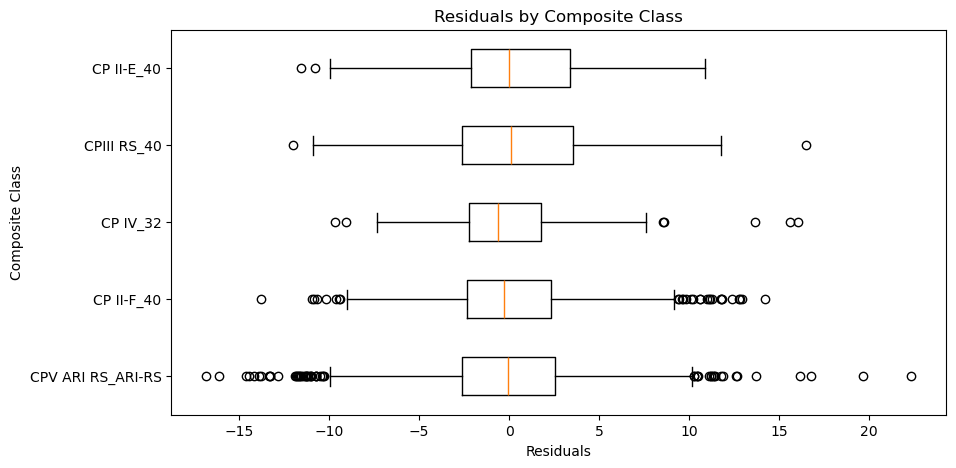

In [15]:
import matplotlib.pyplot as plt


# Fit Random Forest Regressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_tr[features_selected], y_tr)

# Make predictions
y_pred = rf.predict(X_ts[features_selected])

# Calculate residuals
residuals = y_ts - y_pred

# General Performance Metrics
mse = mean_squared_error(y_ts, y_pred)
mae = mean_absolute_error(y_ts, y_pred)
r2 = r2_score(y_ts, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Assuming 'Class1' and 'Class2' are the two columns to stratify by
class_column1 = X_ts[group_columns[0]]
class_column2 = X_ts[group_columns[1]]

# Create a composite class by combining the two columns
composite_class = class_column1.astype(str) + '_' + class_column2.astype(str)

# Create a DataFrame for analysis
results_df = pd.DataFrame({
    'Actual': y_ts,
    'Predicted': y_pred,
    'Residual': residuals,
    'Composite_Class': composite_class
})

# Analyze errors by composite class
error_by_composite_class = results_df.groupby('Composite_Class').agg({
    'Residual': ['mean', 'std', 'max', 'min'],
    'Actual': 'count'
}).reset_index()

print("Error Analysis by Composite Class:")
print(error_by_composite_class)

# Visualize error by composite class
plt.figure(figsize=(10, 5))
plt.boxplot([results_df[results_df['Composite_Class'] == cls]['Residual'] for cls in results_df['Composite_Class'].unique()],
            labels=results_df['Composite_Class'].unique(), vert=False)
plt.title('Residuals by Composite Class')
plt.ylabel('Composite Class')
plt.xlabel('Residuals')
plt.show()


# Focando no tipo de concreto/cimento

In [16]:
tr_CPV = pd.concat([X_tr, y_tr], axis = 1)
tr_CPV = preprocess_data(data = tr_CPV[tr_CPV['cimento Tipo'] == 'CPV ARI RS'],
                                     params_filter = {}, verbose = False)



X_tr_CPV = tr_CPV.drop(columns = 'Fc 28d')
y_tr_CPV = tr_CPV['Fc 28d']

ts_CPV = pd.concat([X_ts, y_ts], axis = 1)
ts_CPV = preprocess_data(data = ts_CPV[ts_CPV['cimento Tipo'] == 'CPV ARI RS'],
                                     params_filter = {}, verbose = False)

X_ts_CPV = ts_CPV.drop(columns = 'Fc 28d')
y_ts_CPV = ts_CPV['Fc 28d']

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [2, 10],
    'min_samples_split': [2, 5],
    }

feature_selector = grid_search_FS_RF(X_tr_CPV.drop(columns = group_columns), y_tr_CPV, param_grid_rf, verbose = False)

feat_importance = feature_selector[1]
features_selected = feat_importance['Feature'].tolist()[:10]

X_tr_CPV_FS = X_tr_CPV[features_selected]
X_ts_CPV_FS = X_ts_CPV[features_selected]

eval_regressor_CV(X_tr_CPV_FS, X_ts_CPV_FS, y_tr_CPV, y_ts_CPV,
                  regressors = None, CV = True, n_splits = 3)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


,MAE_tr,MSE_tr,R2_tr,MAE_val,MSE_val,R2_val,MAE_test,MSE_test,R2_test
Linear Regression,3.574972,19.865032,0.536830,3.585544,19.963723,0.534249,3.536085,20.016135,0.534007
Decision Tree Regressor,0.638060,2.338083,0.945480,3.917359,24.818689,0.421000,3.890585,25.123172,0.415111
Random Forest Regressor,1.493144,4.052302,0.905512,3.285560,17.260169,0.597330,3.257057,17.665613,0.588729
Gradient Boosting Regressor,3.062341,14.792561,0.655098,3.247924,16.604639,0.612638,3.174492,16.256277,0.621540


In [19]:

param_grid_regressor = {
    'n_estimators': [50, 150, 300],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'bootstrap': [True, False]
    }


rf_gridsearch_CPV = grid_search_RFClassifier(X_tr_CPV_FS, y_tr_CPV, param_grid_regressor, 3)

results_CPV_FS = eval_regressor_CV(X_tr_CPV_FS, X_ts_CPV_FS, y_tr_CPV, y_ts_CPV,
                  regressors = {'RF grid_search' : rf_gridsearch_CPV.best_estimator_},
                  CV = True, n_splits = 3)

results_CPV_FS

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val
RF grid_search,3.081082,2.246599,3.107927,15.631479,8.055931,15.404728,0.636085,0.812169,0.640616


Mean Squared Error (MSE): 14.946264965605005
Mean Absolute Error (MAE): 2.99655861755514
R-squared (R2): 0.6520378756237625


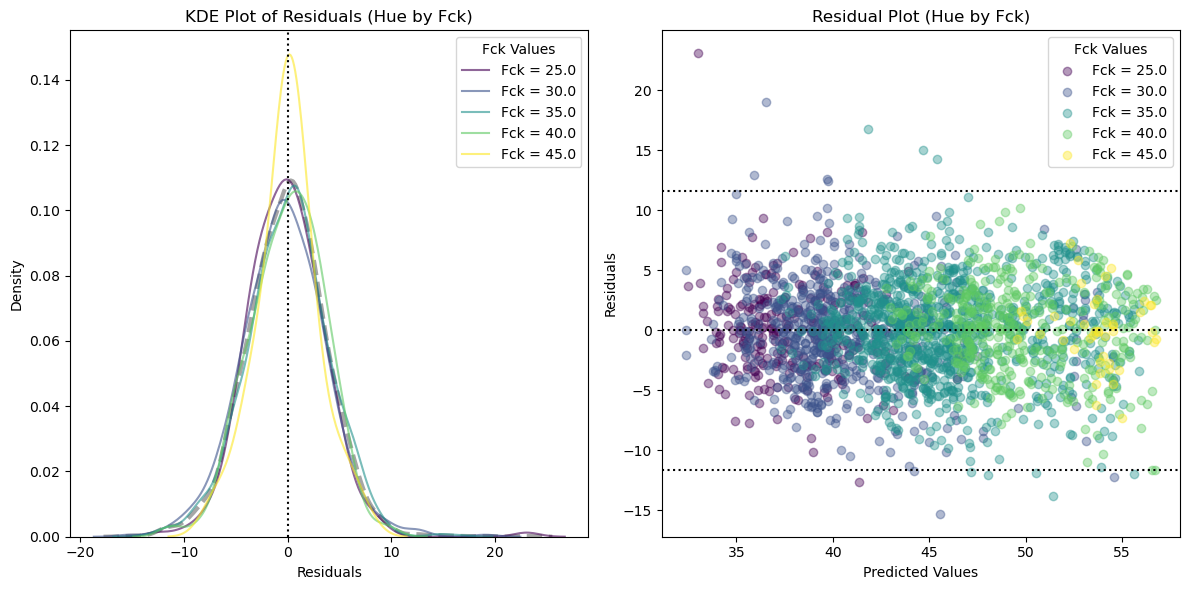

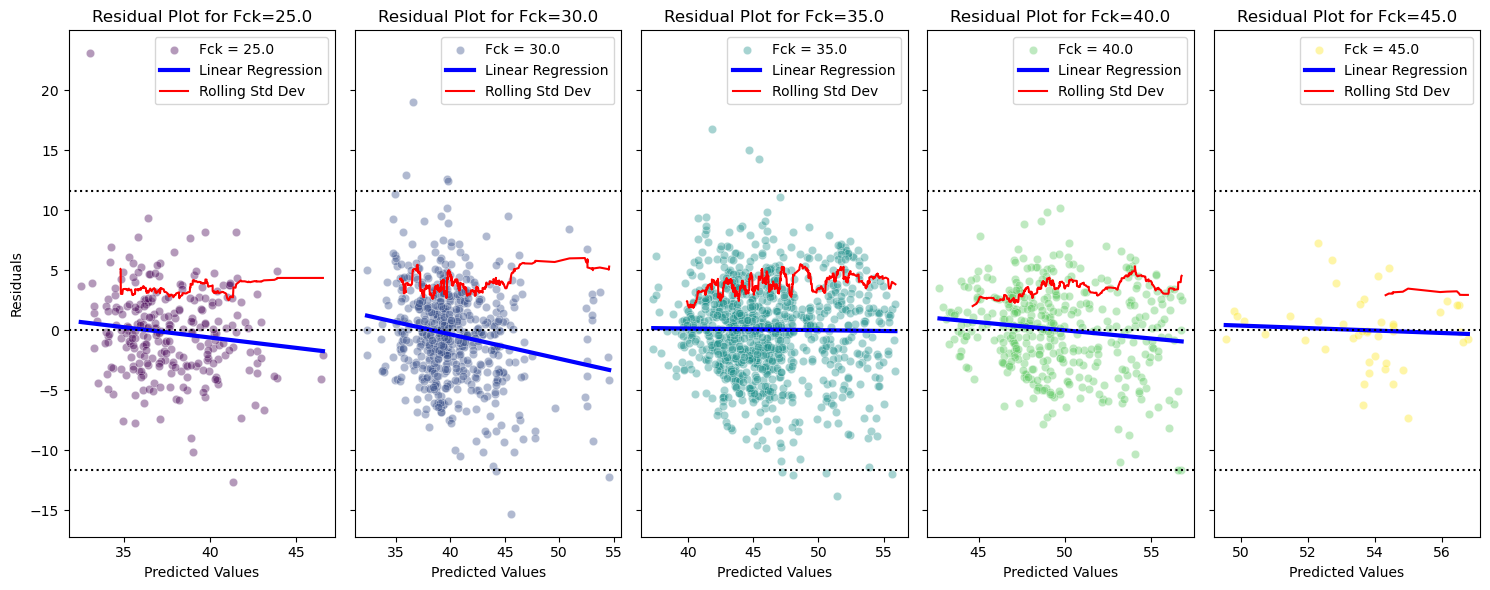

In [20]:
plot_residuals(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, group_columns, regressors = rf_gridsearch_CPV)

plot_residuals_with_rolling_std(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, group_columns,
                                window_size = 30, regressors = rf_gridsearch_CPV)

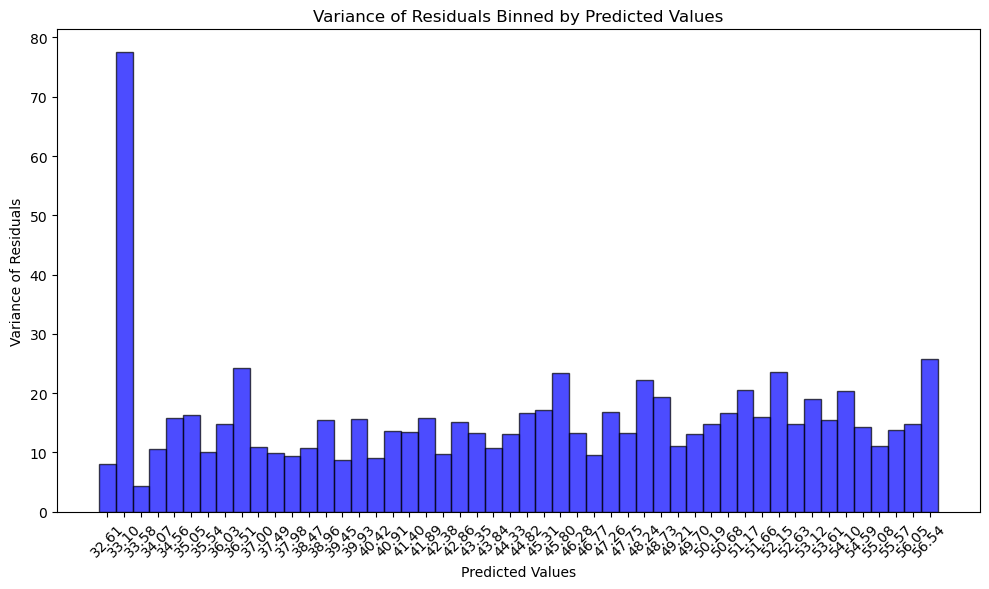

Levene's Test: Statistic = 6.675028905040449, p-value = 0.000174592029017534
Bartlett's Test: Statistic = 15.961771715571173, p-value = 0.001154633135780593


In [21]:
plot_residuals_binned_variance(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, n_bins=50, regressor = rf_gridsearch_CPV)
test_variance_homogeneity(X_tr_CPV[features_selected + ['Fck']], X_ts_CPV[features_selected + ['Fck']], y_tr_CPV, y_ts_CPV, regressor = rf_gridsearch_CPV)

In [84]:
param_grid_feat_selection = {
    'n_estimators': [25, 75, 150],
    'max_depth': [2, 10],
    }
    
param_grid_regressor = {
    'n_estimators': [50, 150, 300],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'bootstrap': [True, False]
    }



**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CP II	 "Treino": (3412, 39)	 "Teste": (1461, 39)


Fck: 25.0	 Treino: (125, 34)	 Validação: (54, 34)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(125, 15)","(54, 15)",1.249659,0.853329,3.125732,0.05561,3.375141,0.034497




Fck: 30.0	 Treino: (942, 35)	 Validação: (403, 35)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(942, 15)","(403, 15)",1.599829,0.768378,2.91432,0.254333,2.999413,0.291603




Fck: 35.0	 Treino: (1181, 36)	 Validação: (506, 36)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1181, 15)","(506, 15)",1.528185,0.755738,2.768573,0.173104,2.614206,0.278836




Fck: 40.0	 Treino: (1164, 36)	 Validação: (498, 36)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1164, 15)","(498, 15)",1.55536,0.783211,2.795681,0.320159,2.75765,0.34311



Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,2.854962,1.631224,2.834007,13.158247,4.47318,13.1715,0.619053,0.868484,0.612185,"(3412, 15)","(1461, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,1.249659,0.853329,3.375141,0.034497,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.599829,0.768378,2.999413,0.291603,"(942, 15)","(403, 15)"
2,CP II_35.0,Random Forest Regressor,1.528185,0.755738,2.614206,0.278836,"(1181, 15)","(506, 15)"
3,CP II_40.0,Random Forest Regressor,1.555360,0.783211,2.757650,0.343110,"(1164, 15)","(498, 15)"
4,CP II_all,Random Forest Regressor,1.631224,0.868484,2.854962,0.619053,"(3412, 15)","(1461, 15)"


Mean Squared Error (MSE): 11.770360543015503
Mean Absolute Error (MAE): 2.7006200084454726
R-squared (R2): 0.6592338672131393


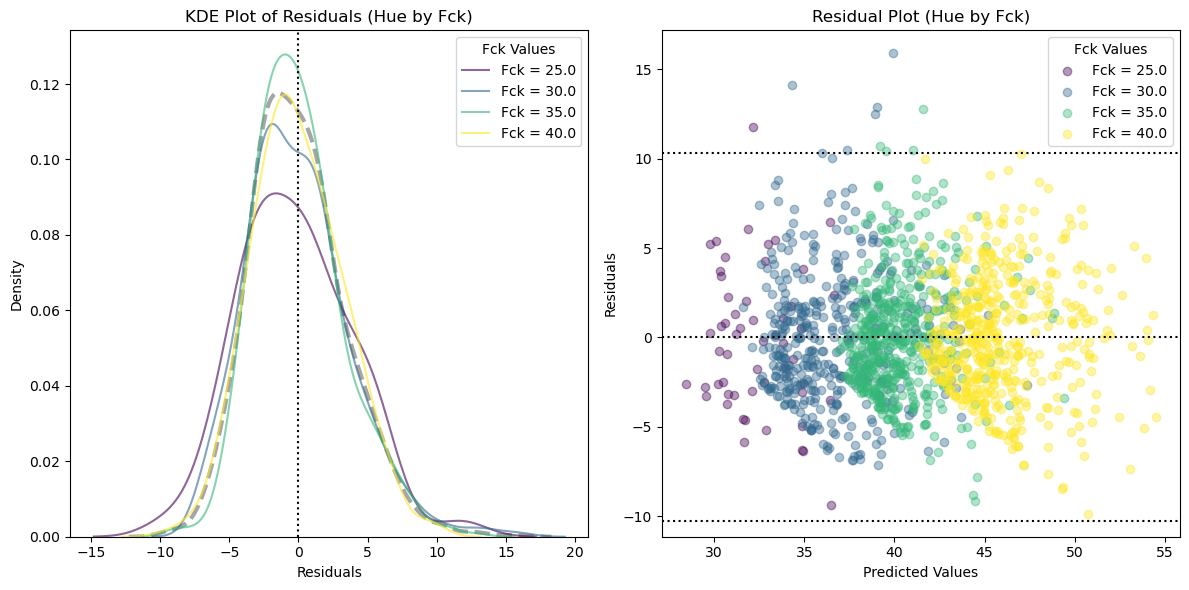

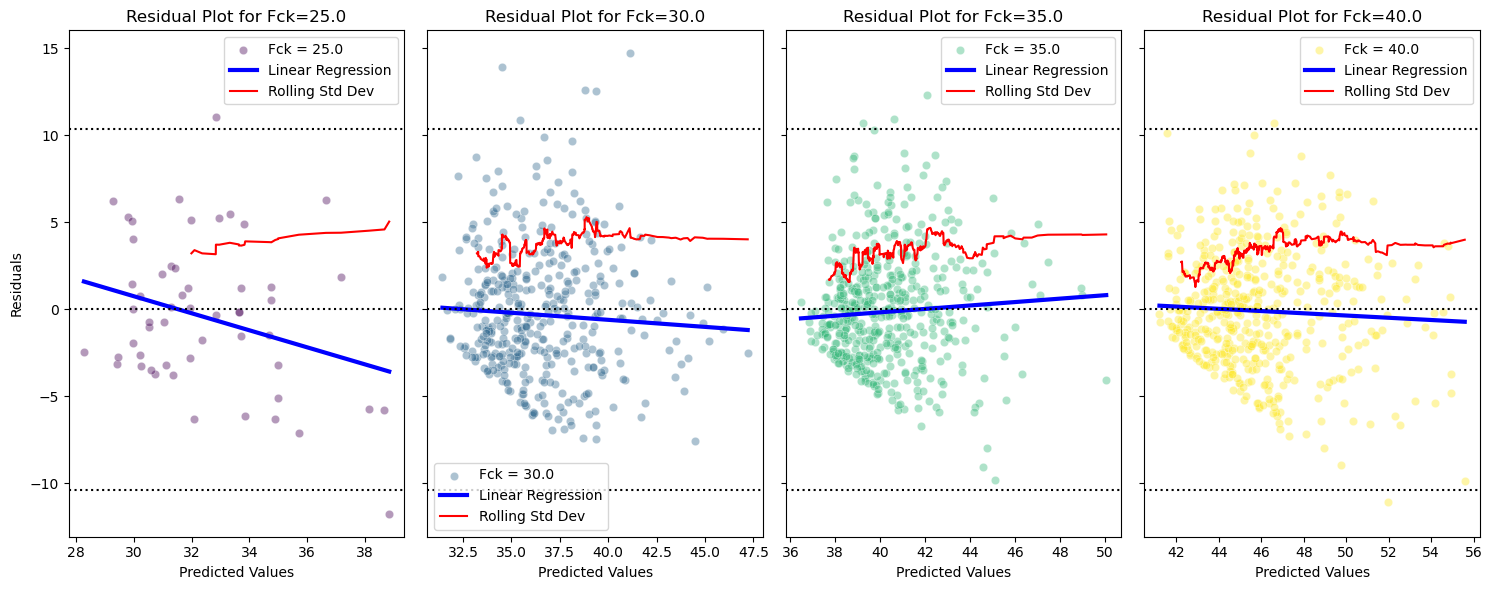

**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CPIII|CP IV	 "Treino": (1377, 39)	 "Teste": (591, 39)


Fck: 25.0	 Treino: (23, 34)	 Validação: (10, 34)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(23, 15)","(10, 15)",2.507608,0.184113,2.911383,-0.405781,3.813032,-0.314554




Fck: 30.0	 Treino: (382, 35)	 Validação: (163, 35)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': False, 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(382, 15)","(163, 15)",3.631337,0.408196,3.746359,0.358136,4.353917,0.310846




Fck: 35.0	 Treino: (333, 35)	 Validação: (143, 35)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(333, 15)","(143, 15)",2.097424,0.651219,2.763275,0.361746,2.993914,0.369647




Fck: 40.0	 Treino: (571, 36)	 Validação: (246, 36)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(571, 15)","(246, 15)",2.03975,0.673178,2.594054,0.449137,2.636905,0.395064




Fck: 45.0	 Treino: (68, 28)	 Validação: (29, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(68, 15)","(29, 15)",2.406704,0.464586,3.542847,-0.14808,3.220009,-0.034504



Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,3.183877,1.921611,3.058735,16.707103,6.302185,16.444714,0.596692,0.848898,0.604095,"(1377, 15)","(591, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,1.249659,0.853329,3.375141,0.034497,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.599829,0.768378,2.999413,0.291603,"(942, 15)","(403, 15)"
2,CP II_35.0,Random Forest Regressor,1.528185,0.755738,2.614206,0.278836,"(1181, 15)","(506, 15)"
3,CP II_40.0,Random Forest Regressor,1.555360,0.783211,2.757650,0.343110,"(1164, 15)","(498, 15)"
4,CP II_all,Random Forest Regressor,1.631224,0.868484,2.854962,0.619053,"(3412, 15)","(1461, 15)"
5,CPIII|CP IV_25.0,Random Forest Regressor,2.507608,0.184113,3.813032,-0.314554,"(23, 15)","(10, 15)"
6,CPIII|CP IV_30.0,Random Forest Regressor,3.631337,0.408196,4.353917,0.310846,"(382, 15)","(163, 15)"
7,CPIII|CP IV_35.0,Random Forest Regressor,2.097424,0.651219,2.993914,0.369647,"(333, 15)","(143, 15)"
8,CPIII|CP IV_40.0,Random Forest Regressor,2.039750,0.673178,2.636905,0.395064,"(571, 15)","(246, 15)"
9,CPIII|CP IV_45.0,Random Forest Regressor,2.406704,0.464586,3.220009,-0.034504,"(68, 15)","(29, 15)"


Mean Squared Error (MSE): 15.391242207576795
Mean Absolute Error (MAE): 3.048393852868457
R-squared (R2): 0.6284571805334283


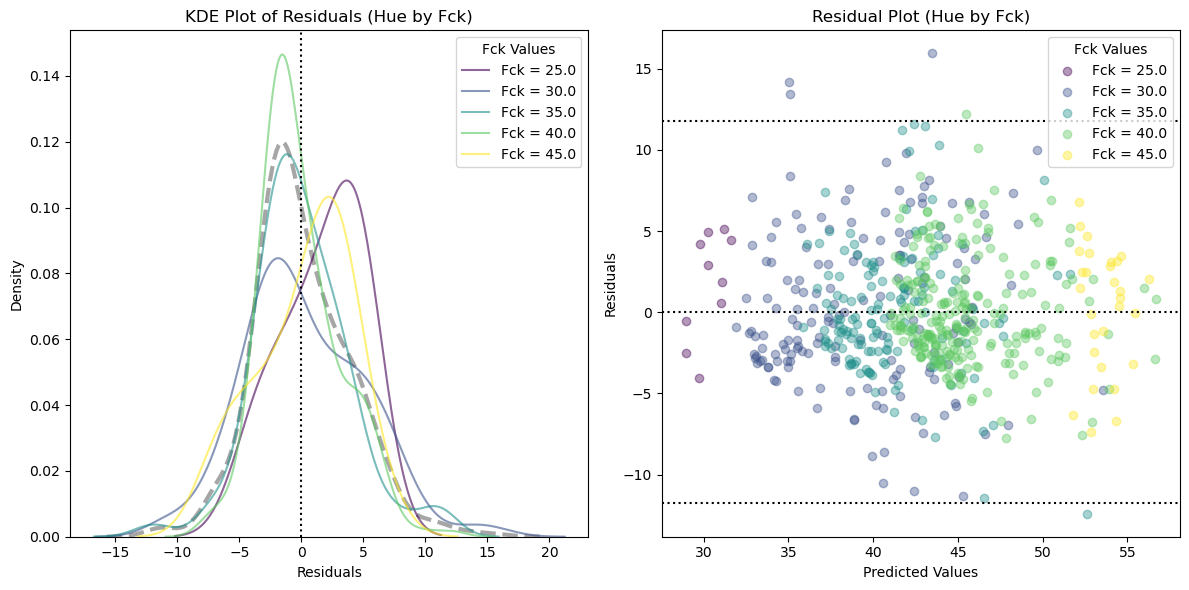

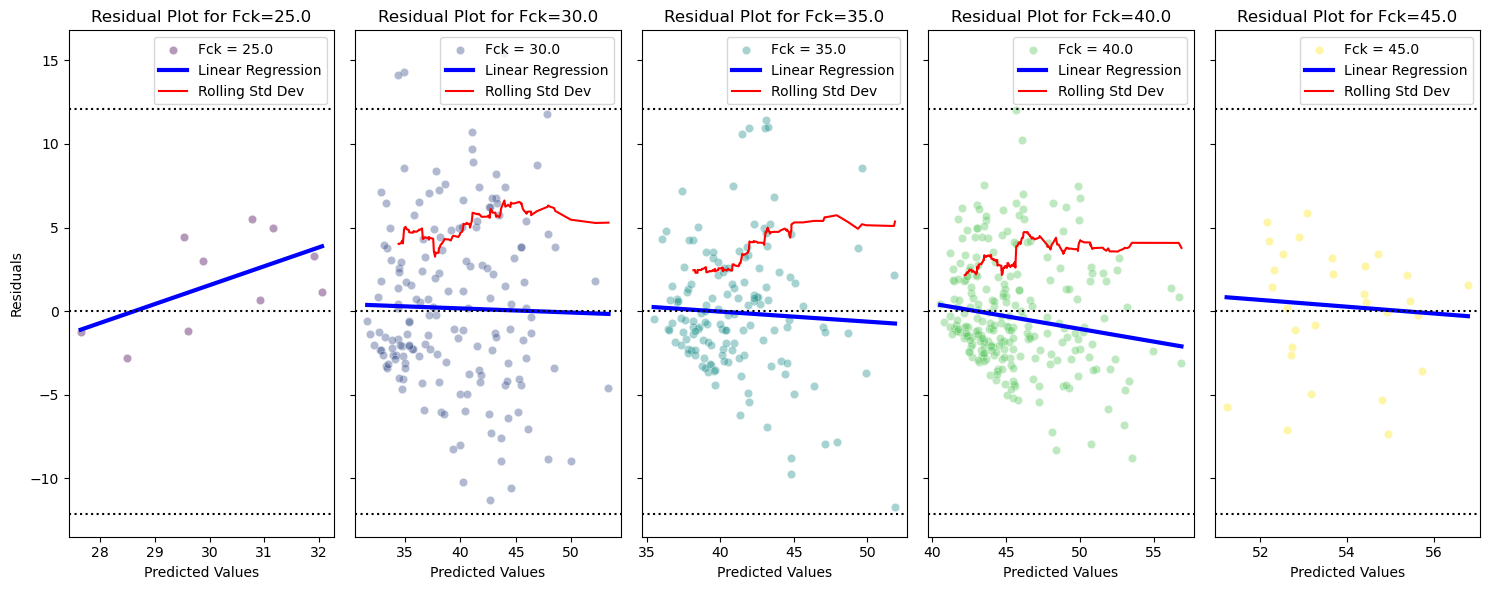

**-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----****-----**


Ciment: CPV	 "Treino": (5264, 39)	 "Teste": (2257, 39)


Fck: 25.0	 Treino: (603, 28)	 Validação: (258, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 25}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(603, 15)","(258, 15)",2.735414,0.388579,3.054169,0.218203,2.889544,0.15454




Fck: 30.0	 Treino: (1351, 27)	 Validação: (580, 27)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(1351, 15)","(580, 15)",2.452125,0.61287,3.136164,0.368707,3.112927,0.321147




Fck: 35.0	 Treino: (2246, 28)	 Validação: (964, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(2246, 15)","(964, 15)",2.420962,0.669689,3.084686,0.467596,3.109346,0.467473




Fck: 40.0	 Treino: (956, 28)	 Validação: (411, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(956, 15)","(411, 15)",2.240385,0.655933,3.024539,0.368212,2.980403,0.323901




Fck: 45.0	 Treino: (101, 28)	 Validação: (44, 28)

Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 2, 'n_estimators': 150}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


,Shape_treino,Shape_teste,MAE_tr,R2_tr,MAE_val,R2_val,MAE_test,R2_test
Random Forest Regressor,"(101, 15)","(44, 15)",2.138847,0.507529,2.885072,0.123265,2.245348,0.145425



Grid search - Feature selection
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for RandomForestRegressor:  {'max_depth': 10, 'n_estimators': 75}

Grid search - Regressor
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters for RandomForestRegressor:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


,MAE_test,MAE_tr,MAE_val,MSE_test,MSE_tr,MSE_val,R2_test,R2_tr,R2_val,Shape_treino,Shape_teste
Random Forest Regressor,3.040161,2.530213,3.084416,15.160039,10.170649,15.128224,0.646975,0.762747,0.647061,"(5264, 15)","(2257, 15)"



 Compilado resultados:


,CP_Fck,Model,MAE_tr,R2_tr,MAE_test,R2_test,Shape_treino,Shape_teste
0,CP II_25.0,Random Forest Regressor,1.249659,0.853329,3.375141,0.034497,"(125, 15)","(54, 15)"
1,CP II_30.0,Random Forest Regressor,1.599829,0.768378,2.999413,0.291603,"(942, 15)","(403, 15)"
2,CP II_35.0,Random Forest Regressor,1.528185,0.755738,2.614206,0.278836,"(1181, 15)","(506, 15)"
3,CP II_40.0,Random Forest Regressor,1.555360,0.783211,2.757650,0.343110,"(1164, 15)","(498, 15)"
4,CP II_all,Random Forest Regressor,1.631224,0.868484,2.854962,0.619053,"(3412, 15)","(1461, 15)"
5,CPIII|CP IV_25.0,Random Forest Regressor,2.507608,0.184113,3.813032,-0.314554,"(23, 15)","(10, 15)"
6,CPIII|CP IV_30.0,Random Forest Regressor,3.631337,0.408196,4.353917,0.310846,"(382, 15)","(163, 15)"
7,CPIII|CP IV_35.0,Random Forest Regressor,2.097424,0.651219,2.993914,0.369647,"(333, 15)","(143, 15)"
8,CPIII|CP IV_40.0,Random Forest Regressor,2.039750,0.673178,2.636905,0.395064,"(571, 15)","(246, 15)"
9,CPIII|CP IV_45.0,Random Forest Regressor,2.406704,0.464586,3.220009,-0.034504,"(68, 15)","(29, 15)"


Mean Squared Error (MSE): 14.351331868026811
Mean Absolute Error (MAE): 2.9510289762597135
R-squared (R2): 0.6658070428031404


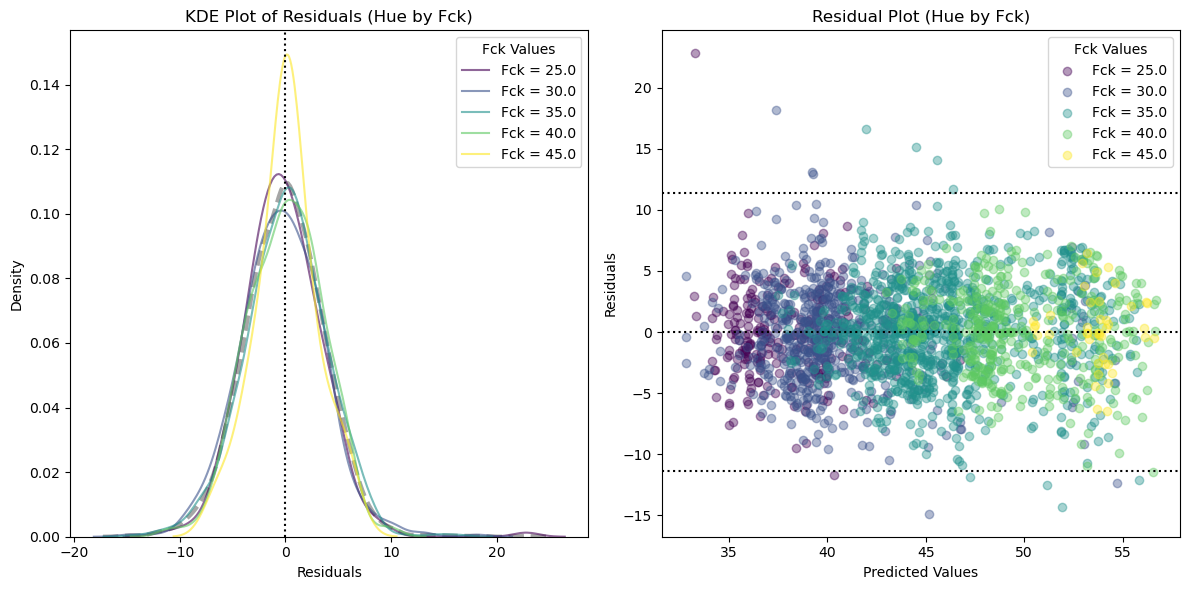

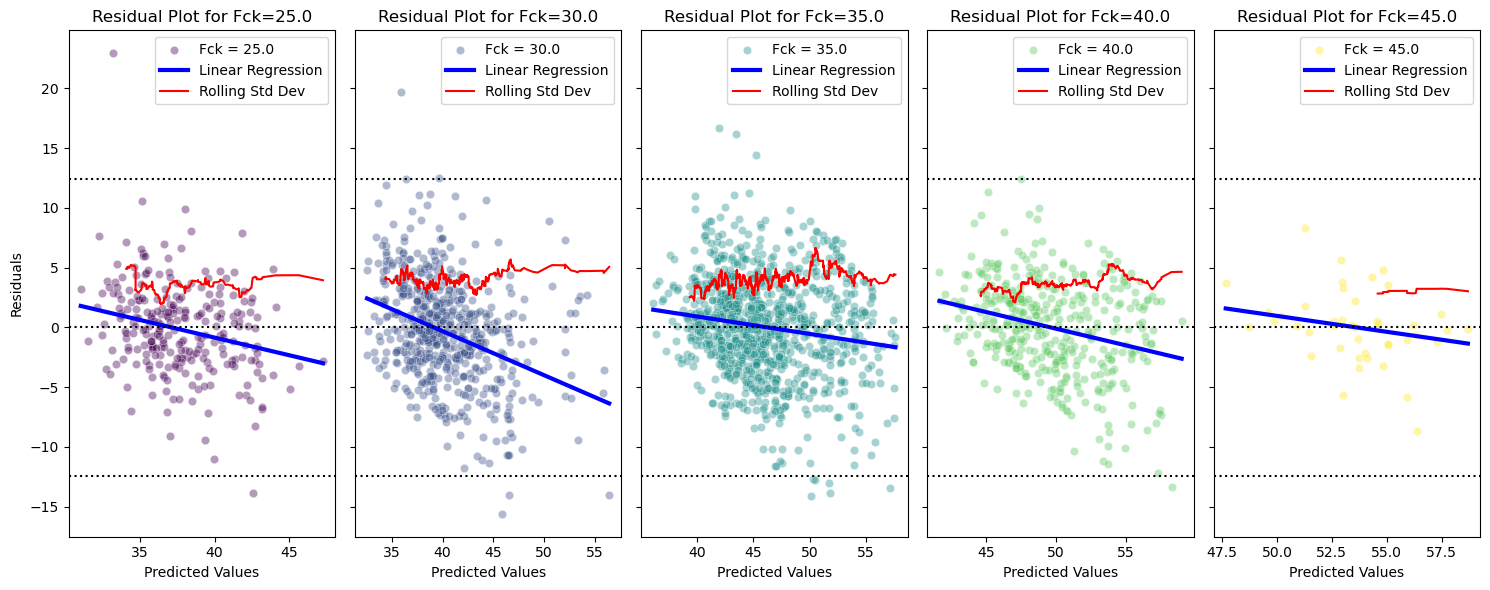

In [85]:
run_experiment_ciment_fck(X_tr = X_tr,
                          X_ts = X_ts,
                          y_tr = y_tr,
                          y_ts = y_ts,
                          param_grid_feat_selection = param_grid_feat_selection,
                          param_grid_regressor = param_grid_regressor,
                          group_columns = group_columns,
                          n_splits = 3)

# Classificador

In [102]:
def apply_standardization_filter(data, remove_params, verbose = True, regression = True):
    # TODO: implement filter to verify class/fck_min
    # concrete_class = 'CP V'
    # age = '7_days'

    data_processed = data.copy()  # Caso precise incluir features

    # Feature analysed: 'Fck'
    for feat, lim in remove_params.items():
        if verbose: print(f'{"Instâncias eliminadas devido a falta de representatividade (Fck = " + feat + " MPA):" :<90}',
              len(data_processed[data_processed['Fck'] == lim]))
        data_processed = data_processed[data_processed['Fck'] != lim]

    # Feature analysed: 'AC'
    if verbose: print(f'{"Instâncias eliminadas devido não conformidade NBR6118:2023 (relação água/cimento):" :<90}',
          len(data_processed[data_processed['AC'] > 0.65]))
    data_processed = data_processed[data_processed['AC'] <= 0.65]
    
    if regression:
        # Feature analysed: 'Fc 28d'
        ## Precisa de análise mais detalhada!!!
        data_processed['Status'] = np.where(data_processed['Fc 28d'] >= data_processed['Fck'], 1, 0)
        if verbose: print(f'{"Instâncias eliminadas devido não conformidade resistência especificada:" : <90}',
              len(data_processed[data_processed['Status'] == 0]))
        data_processed = data_processed[data_processed['Status'] == 1]

        data_processed.drop(columns = ['Status'], inplace = True)

    return data_processed

In [100]:
df_traco_processed_NBR

,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
0,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
1,303.0,AA,60004.0,28/03/2023,08:15:50,SÃO JOSÉ DO RIO PRETO,CP II-F,40,205.428571,1.708566,...,1179.0,770.0,1949.0,1.234266,2.888112,2.692308,0.000000,4.122378,2.692308,6.814685
2,303.0,AA,59842.0,16/03/2023,08:24:51,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.809998,...,1163.0,768.0,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014
3,303.0,AA,59849.0,16/03/2023,11:14:41,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.625000,2.797501,...,1163.0,768.0,1931.0,1.191781,2.791096,2.630137,0.000000,3.982877,2.630137,6.613014
4,303.0,AA,59841.0,16/03/2023,08:12:38,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.125000,2.812500,...,1163.0,768.0,1931.0,0.993151,2.989726,2.630137,0.000000,3.982877,2.630137,6.613014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20513,303.0,N,71662.0,01/11/2022,13:43:40,FLORIANÓPOLIS,CP IV,32,363.250000,2.503750,...,956.0,795.0,1751.0,2.853731,0.000000,1.182090,1.191045,2.853731,2.373134,5.226866
20514,303.0,N,67943.0,11/04/2022,13:39:29,FLORIANÓPOLIS,CP IV,32,0.000000,0.000000,...,985.0,809.0,1794.0,2.914201,0.000000,1.165680,1.227811,2.914201,2.393491,5.307692
20515,303.0,N,68493.0,13/05/2022,13:47:33,FLORIANÓPOLIS,CP IV,32,366.000000,2.401249,...,1049.0,812.0,1861.0,0.677419,2.706452,1.277419,1.341935,3.383871,2.619355,6.003226
20516,303.0,N,68383.0,06/05/2022,10:51:32,FLORIANÓPOLIS,CP IV,32,384.166667,2.703334,...,1049.0,815.0,1864.0,0.677419,2.706452,1.280645,1.348387,3.383871,2.629032,6.012903


In [104]:
# Remove de acordo com parâmetros, aPlica filtros da norma (fator a/c, resistencia esperada,etc)
df_traco_processed_NBR_class = apply_standardization_filter(data = df_traco_processed,
                                                            remove_params = {'15': 15,
                                                                             '50': 50},
                                                            regression = False)

df_traco_processed_NBR_class

Instâncias eliminadas devido a falta de representatividade (Fck = 15 MPA):                 5
Instâncias eliminadas devido a falta de representatividade (Fck = 50 MPA):                 42
Instâncias eliminadas devido não conformidade NBR6118:2023 (relação água/cimento):         15592


,Empresa,Planta,Nota Fiscal,Data,Horário,Cidade,cimento Tipo,cimento Classe de resistência,concreto Cimento,concreto Polifuncional,...,Brita_total,Areia_total,Agregados,CT Brita 0_Cimento,CT Brita 1_Cimento,CT Areia natural_Cimento,CT Areia artificial_Cimento,Brita_total_Cimento,Areia_total_Cimento,Agregados_Cimento
12553,303.0,AA,50427.0,23/11/2021,09:17:47,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.666667,2.802219,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
12806,303.0,AA,50335.0,17/11/2021,06:52:20,SÃO JOSÉ DO RIO PRETO,CP II-F,40,291.333333,2.808334,...,1119.0,792.0,1911.0,1.143345,2.675768,2.703072,0.000000,3.819113,2.703072,6.522184
12842,303.0,AA,57427.0,30/09/2022,15:14:54,SÃO JOSÉ DO RIO PRETO,CP II-F,40,290.714286,2.509997,...,1160.0,750.0,1910.0,1.188356,2.784247,2.568493,0.000000,3.972603,2.568493,6.541096
12919,303.0,AA,49430.0,28/09/2021,12:59:05,SÃO JOSÉ DO RIO PRETO,CP II-F,40,320.375000,3.102497,...,1133.0,789.0,1922.0,1.153061,2.700680,2.683673,0.000000,3.853741,2.683673,6.537415
12976,303.0,AA,57608.0,13/10/2022,10:41:31,SÃO JOSÉ DO RIO PRETO,CP II-F,40,296.875000,2.511250,...,1146.0,748.0,1894.0,1.151007,2.694631,2.510067,0.000000,3.845638,2.510067,6.355705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236401,303.0,Z,74976.0,26/10/2021,13:47:38,BRASÍLIA,CP II-F,40,332.750000,3.693748,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236402,303.0,Z,74824.0,19/10/2021,15:59:24,BRASÍLIA,CP II-F,40,332.875000,3.714996,...,1000.0,806.0,1806.0,2.994012,0.000000,1.065868,1.347305,2.994012,2.413174,5.407186
236403,303.0,Z,82901.0,20/02/2023,08:07:39,BRASÍLIA,CP II-F,40,397.250000,4.003750,...,1017.0,722.0,1739.0,0.575071,2.305949,0.898017,1.147309,2.881020,2.045326,4.926346
236404,303.0,Z,76483.0,13/01/2022,07:37:00,BRASÍLIA,CP II-F,40,348.250000,3.303745,...,987.0,801.0,1788.0,2.836207,0.000000,1.017241,1.284483,2.836207,2.301724,5.137931


In [ ]:
X = df_traco_processed_NBR_class.drop(drop_columns, axis=1)
y = df_traco_processed_NBR_class[target]

# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify = stratify_col,
                                                    random_state=42)


# Combine the columns 'cimento Tipo' and 'cimento Classe de resistência' for stratification
stratify_col = X_train[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)

# Split the data into training and testing sets
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train,
                                        test_size=0.3,
                                        stratify = stratify_col,
                                        random_state=42)

X_tr_clean = X_tr.drop(columns = group_columns)
X_ts_clean = X_ts.drop(columns = group_columns)

print('Training-Test set:')
for v in [y_train, y_test]:
    print(v.shape)

print('\nTraining-Validation set:')
for v in [y_tr, y_ts]:
    print(v.shape)

In [ ]:
# Define the resampling methods
oversample = SMOTE(random_state = 42)
undersample = RandomUnderSampler(random_state = 42)

# Apply oversampling to the training data
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)

# Apply undersampling to the oversampled training data
X_train_balanced, y_train_balanced = undersample.fit_resample(X_train_oversampled, y_train_oversampled)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the balanced training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Define the classification algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
    }

# Initialize a dictionary to store results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_scaled, y_train_balanced)

    # Make predictions
    y_pred = clf.predict(X_test_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T

# Print the report
print("Classification Algorithms Performance Report:")
print(results_df)
np.unique(y_train_balanced, return_counts = True)
df_CPV.columns
qwe = df_concreto_traco[df_concreto_traco['cimento Tipo'] == 'CPV ARI RS'].copy()
for c in qwe.iloc[:, 5:]:
    qwe[c] = qwe[c].astype(float)
qwe.describe()